# SalePrice Customer Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested to understand the patterns from the customer base, so the client can learn the most relevant variables that are correlated to a churned customer.

## Inputs

* outputs/datasets/collection/HousePrediction.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Project5_PredictiveAnalytics/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Project5_PredictiveAnalytics'

---

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/HousePrediction.csv")
      .drop(['EnclosedPorch', 'WoodDeckSF'], axis=1))
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [ ]:
from feature_engine.imputation import CategoricalImputer

variables_method = ['GarageFinish', 'BsmtFinType1']

imputer = CategoricalImputer(imputation_method='missing',
                            variables=variables_method)
imputer.fit(df)
df = imputer.transform(df)

In [ ]:
dic = {'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}, 'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6, 'missing' :7}, 
           'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3, 'missing':4}, 'KitchenQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}}
df=df.copy()
df.head()

In [ ]:
from feature_engine.imputation import MeanMedianImputer
imputer = MeanMedianImputer(imputation_method='median',
                            variables=['2ndFlrSF' , 'BedroomAbvGr',
                                       'GarageYrBlt', 'LotFrontage', 'MasVnrArea'])

imputer.fit(df)
df = imputer.transform(df)

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# PPS and Correlation Study

In [6]:
lst = []
for col in df.columns[df.dtypes!='object'].to_list():
    if col != 'SalePrice':
        df1 = df[df[col]!=0]
        df2 = df1[df1[col].notnull()]
        df3 = df2.filter(['SalePrice', col])
        corr_spearman = df3.corr(method='spearman')['SalePrice'][1:].round(2)
        lst.append(corr_spearman[col])
corr_num = pd.Series(index=df.columns[df.dtypes!='object'].drop(['SalePrice']).to_list(), data=lst).sort_values(key=abs, ascending=False)
print(corr_num)

OverallQual     0.81
GrLivArea       0.73
2ndFlrSF        0.69
YearBuilt       0.65
GarageArea      0.61
GarageYrBlt     0.59
1stFlrSF        0.58
TotalBsmtSF     0.58
YearRemodAdd    0.57
LotArea         0.46
LotFrontage     0.41
BsmtFinSF1      0.40
MasVnrArea      0.33
BedroomAbvGr    0.24
OpenPorchSF     0.16
OverallCond    -0.13
BsmtUnfSF       0.11
dtype: float64


In [7]:
# The dictionary dic maps the ordinal categorical values to integers for the four object variables.
dic = {'BsmtExposure': {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0}, 'BsmtFinType1': {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0}, 'GarageFinish': {'Fin': 2, 'RFn': 1, 'Unf': 0}, 'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}}
lst = []
# Remove first None and missing values
for col in df.columns[df.dtypes=='object'].to_list():
    df1 = df[df[col]!='None']
    df2 = df1[df1[col].notnull()]
    df3[col] = df2[col].replace(dic[col])
    df4 = df3.filter(['SalePrice', col])
    corr_spearman = df4.corr(method='spearman')['SalePrice'][1:].round(2)
    lst.append(corr_spearman[col])
corr_object = pd.Series(index=df.columns[df.dtypes=='object'].to_list(), data=lst).sort_values(key=abs, ascending=False)
print(corr_object)

KitchenQual     0.67
GarageFinish    0.60
BsmtFinType1    0.33
BsmtExposure    0.30
dtype: float64


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean   std  min  25%  50%    75%    max
ppscore  462.0  0.065  0.11  0.0  0.0  0.0  0.094  0.702


In [8]:
corr = corr_num.append(corr_object).sort_values(key=abs, ascending=False).round(2)
corr_df = pd.DataFrame(index=['SalePrice'], columns=corr.index, data=corr.values.reshape(1,-1).tolist())
corr_df_rev = corr_df[corr_df.columns[::-1]]
corr

/tmp/ipykernel_15957/448136342.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr = corr_num.append(corr_object).sort_values(key=abs, ascending=False).round(2)


OverallQual     0.81
GrLivArea       0.73
2ndFlrSF        0.69
KitchenQual     0.67
YearBuilt       0.65
GarageArea      0.61
GarageFinish    0.60
GarageYrBlt     0.59
1stFlrSF        0.58
TotalBsmtSF     0.58
YearRemodAdd    0.57
LotArea         0.46
LotFrontage     0.41
BsmtFinSF1      0.40
MasVnrArea      0.33
BsmtFinType1    0.33
BsmtExposure    0.30
BedroomAbvGr    0.24
OpenPorchSF     0.16
OverallCond    -0.13
BsmtUnfSF       0.11
dtype: float64



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



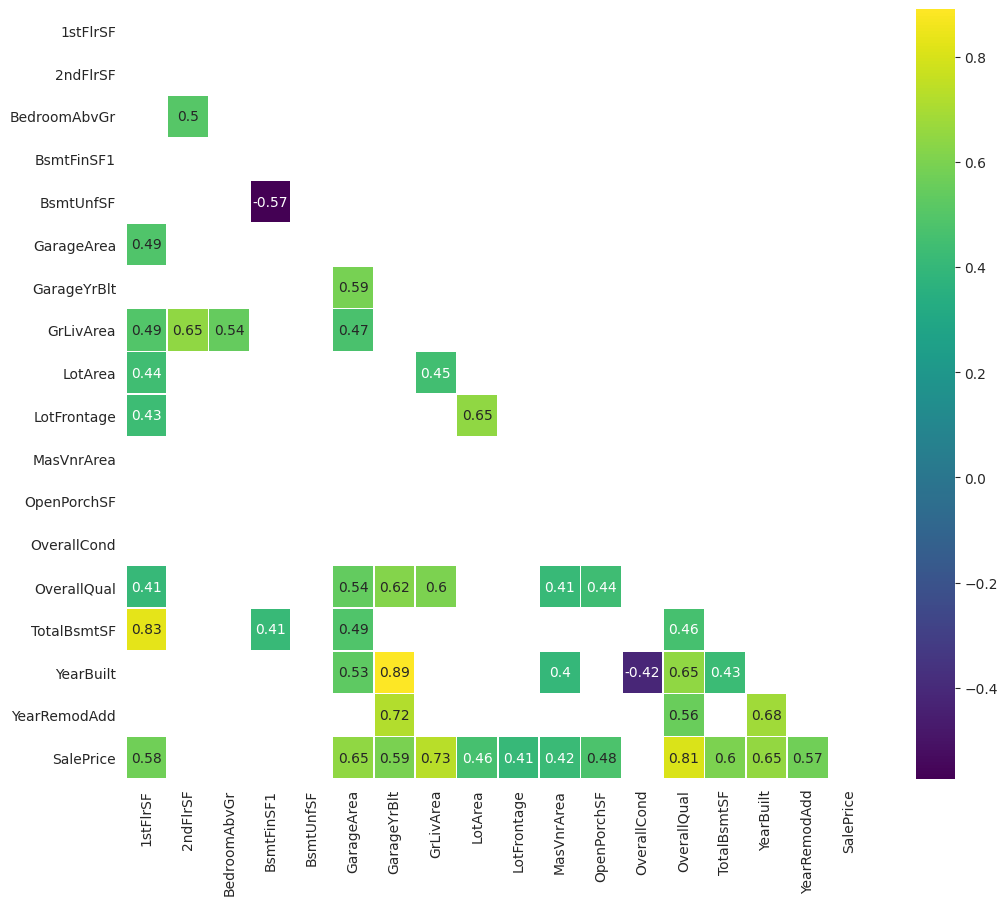



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



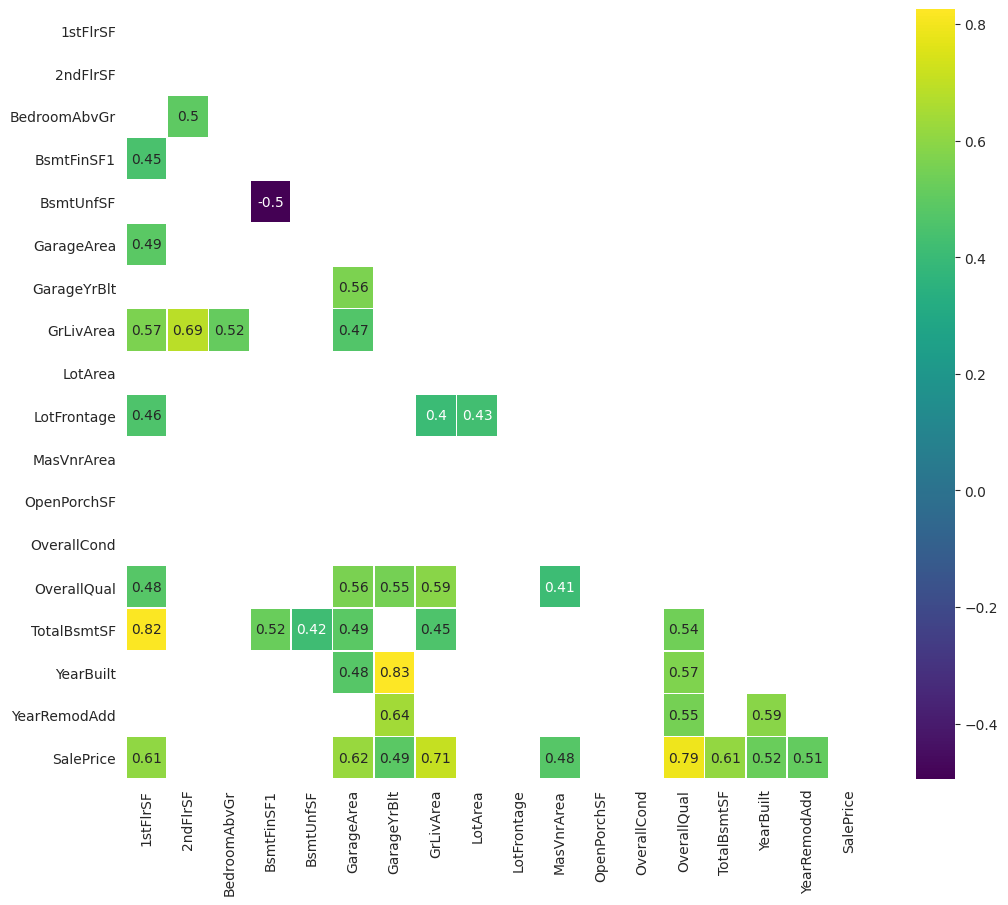



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



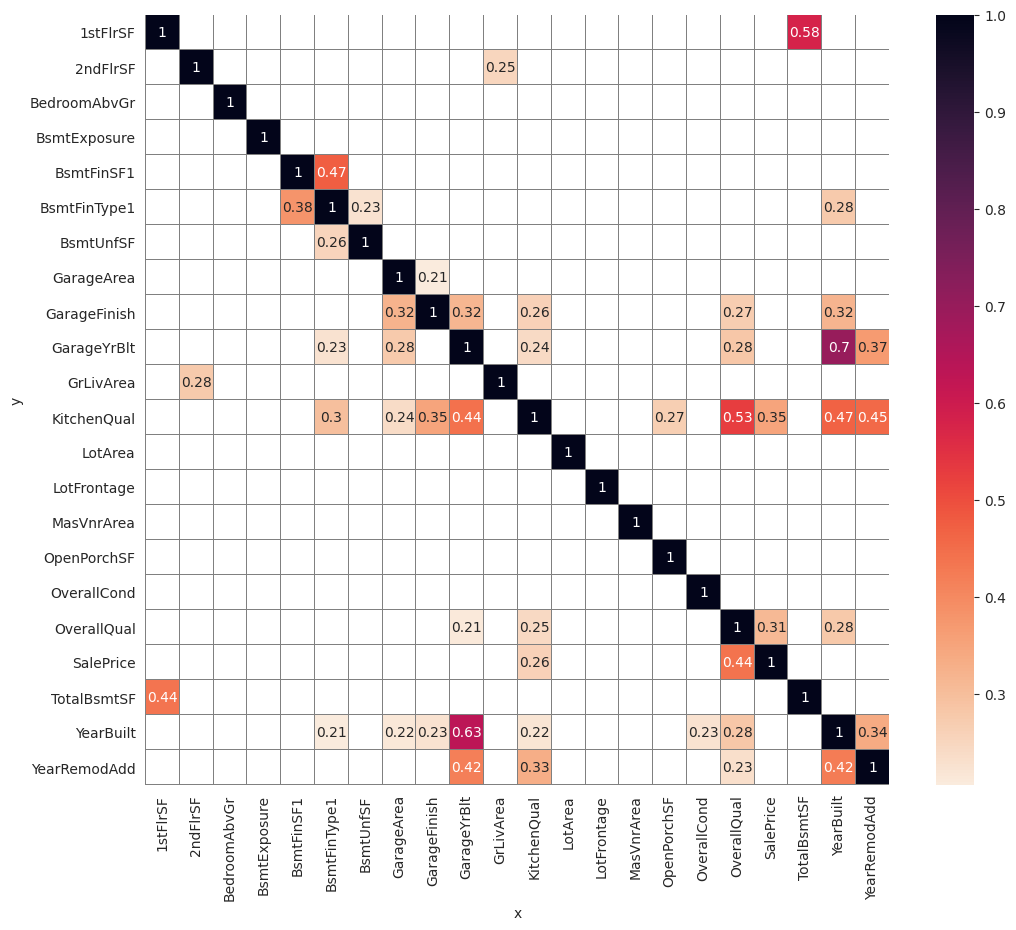

In [15]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

In [9]:

# Calcular la correlación entre 'SalePrice' y otras variables
corr = corr_num.append(corr_object).sort_values(key=abs, ascending=False).round(2)

# Obtener los 4 mayores valores de la Serie 'corr'
top_5 = corr.nlargest(5)

# Mostrar el resultado
print(top_5)

OverallQual    0.81
GrLivArea      0.73
2ndFlrSF       0.69
KitchenQual    0.67
YearBuilt      0.65
dtype: float64


/tmp/ipykernel_15957/976649482.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr = corr_num.append(corr_object).sort_values(key=abs, ascending=False).round(2)


In [10]:
vars_to_study = ['OverallQual',
 'GarageArea',
 '2ndFlrSF',
 'KitchenQual',
 'YearBuilt',]
vars_to_study

['OverallQual', 'GarageArea', '2ndFlrSF', 'KitchenQual', 'YearBuilt']

In [11]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,OverallQual,GarageArea,2ndFlrSF,KitchenQual,YearBuilt,SalePrice
0,7,548,854.0,Gd,2003,208500
1,6,460,0.0,TA,1976,181500
2,7,608,866.0,Gd,2001,223500


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min    25%    50%    75%    max
ppscore   30.0  0.172  0.151  0.0  0.008  0.163  0.258  0.527


* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



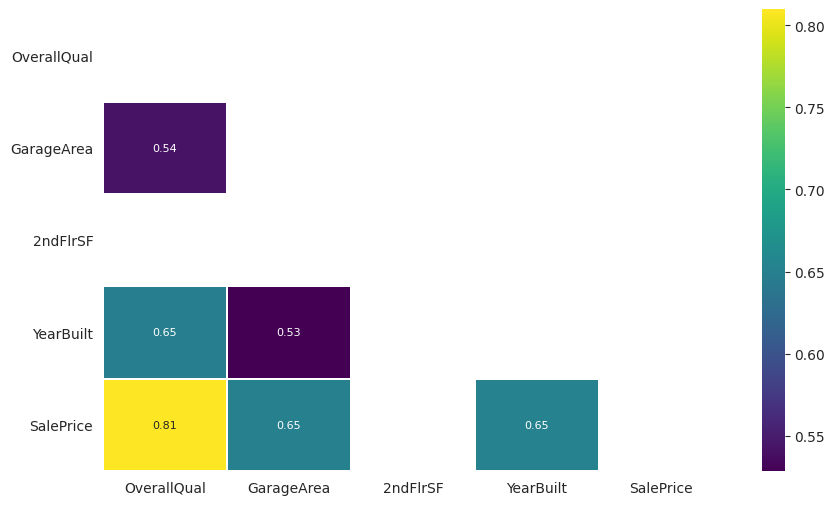



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



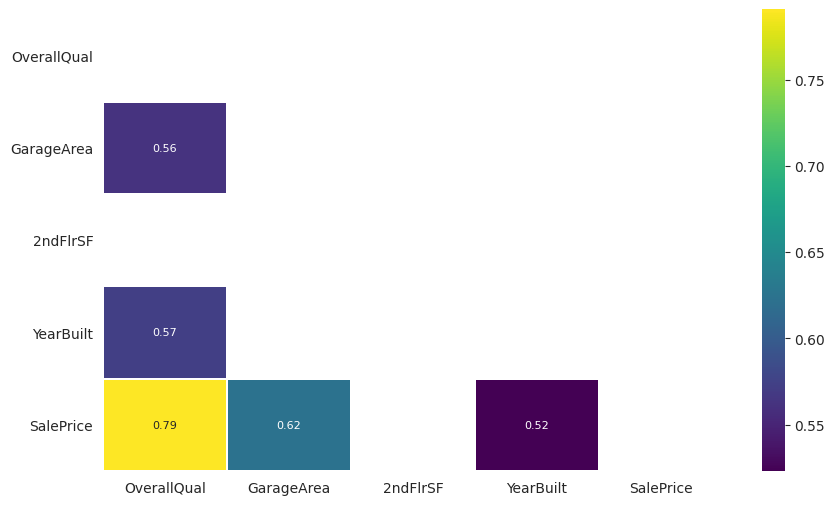



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



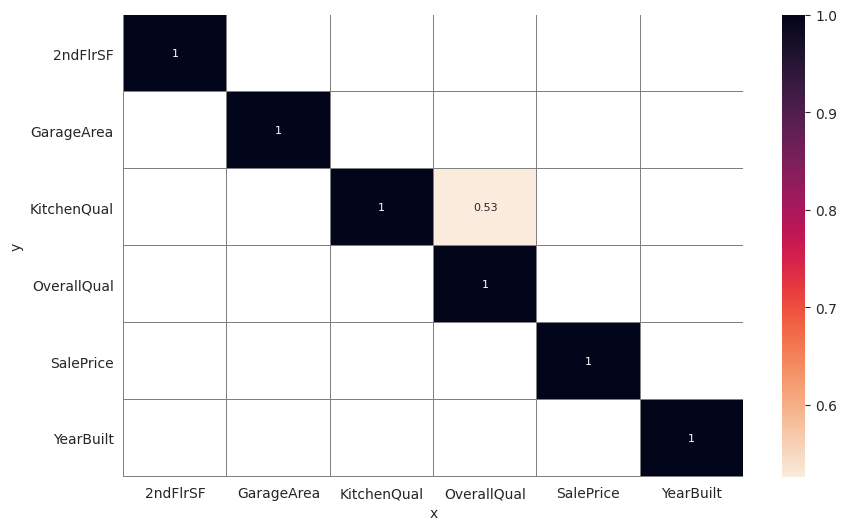

In [21]:
# Definir las funciones que has escrito
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()

def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
   if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix

def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):
    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

# Seleccionar las variables a estudiar
vars_to_study = ['OverallQual',
 'GarageArea',
 '2ndFlrSF',
 'KitchenQual',
 'YearBuilt',
'SalePrice']

# Filtrar el DataFrame original por esas columnas
df_filtered = df[vars_to_study]

# Calcular la correlación y el PPS con el DataFrame filtrado
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df_filtered)

# Mostrar los resultados con los umbrales y tamaños que quieras
DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold=0.5, PPS_Threshold=0.5,
                      figsize=(10, 6), font_annot=8)

In [39]:
# Code from Code Institute Scikit lesson
sns.set_style("whitegrid")
def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,5), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[1], whis=3)
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    # An outlier is defined to be outside the box in the boxplot by three times the
    # interquantile distance
    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a datapoint is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 3*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 3*IQR).round(2)}")
    print("\n")

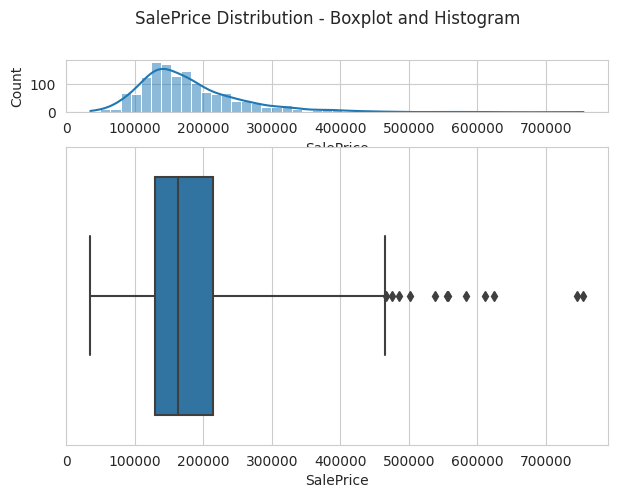

This is the range where a datapoint is not an outlier: from -122100.0 to 466075.0




In [40]:
df2=df.filter(['SalePrice'])
plot_histogram_and_boxplot(df2)

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the absolute value, by setting `key=abs`

In [ ]:
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman, 
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.6, PPS_Threshold=0.15,
                  figsize=(10,5), font_annot=8)

In [ ]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

We do the same for `pearson`

In [ ]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

For both methods, we notice weak or moderate levels of correlation between Churn and a given variable. 
* Ideally, we pursue strong correlation levels. However, this is not always possible.

We will consider the top five correlation levels at `df_ohe` and will study the associated variables at `df`

In [ ]:
top_n = 4
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

Therefore we are studying at df the following variables. We will investigate if:
* A churned customer typically has a month-to-month contract.
* A churned customer typically has fiber optic.
* A churned customer typically doesn't have tech support.
* A churned customer doesn't have online security.
* A churned customer typically has low tenure levels.

In [ ]:
vars_to_study = ['GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

---

# Store correlation coefficients dataframe

In [41]:
import joblib
import os

version = 'v1'
file_path = f'outputs/house_prices_study/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

In [42]:
corr_df_rev.to_csv(f"{file_path}/corr_df_rev.csv", index=False)

# Store dictionary used for encoding object variables

In [43]:
joblib.dump(value=dic, filename=f"{file_path}/dic.pkl")

['outputs/house_prices_study/v1/dic.pkl']

---

# Conclusions and Next steps

The correlations and plots interpretation converge. 
* A churned customer typically has a month-to-month contract.
* A churned customer typically has fiber optic.
* A churned customer typically doesn't have tech support.
* A churned customer doesn't have online security.
* A churned customer typically has low tenure levels.

---

Well done! You generated code that answers business requirement 1 and can be used to build Streamlit App
* In this notebook, we are not pushing any file to the repo.
* Clear the cell's outputs before moving on!